# Assignment 8
This notebook covers the GAN exercise for the next week. Please upload your solution both in Whiteboard and eduflow.
    The deadline is Monday, February 14, 11:55 am.

## Exercise 15: GANs

In this exercise, we will work on GANs networks (https://arxiv.org/pdf/1406.2661.pdf). This kind of network is part of the generative networks who are actually able to generate synthetic data. This network is composed of two parts, a generator responsible for generating fake data and a discriminator for investigating the validity of the images.

In [7]:
from IPython.display import Image
Image(url="https://www.researchgate.net/publication/336781462/figure/fig2/AS:817722363494401@1571971612898/Example-of-a-typical-GANs-architecture-for-both-hand-written-digits-recognition-and.png", width=700)

The discriminator can be seen as a very simple fully connected network, composed of several layers of neurons and a simple output of one neuron who just determines if an image is true or false.

The generator looks more like the upscaling part of the segmentation network. A small piece of noise is injected and the output is an image.

The training is maybe the most original part.

First, you train the discriminator alone by injecting the training set (True data so label=True) and a set of data generated by the generator (label=False) you then have a loss to backpropagate. *Applause, you trained you discriminator for one batch*

Second, you inject some noise in your generator, the generator produces some fake images, you inject these fake images into you discriminator and use the labels generated by the discriminator to compute your backpropagation. So to train your generator, you will consider the generator and the discriminator as the same network, you just don't train the discriminator in this case.

### 15.1 Training a GAN

We ask you then to program you own GAN. this network should be just compose of fully connected layer (no conv). You should define the architecture of the network, then provide two training functions one for the generator and one for the discriminator and make them learn!

We will take the MNIST dataset here for simplicity and lightness. The architecture I used was :

G : (Input : random Tensor = 100) => (FC1 : fully connected = 256) => (BatchNormalisation) => (LeakyReLU) => (DropOut) => (FC2 : fully connected = 512) => (BatchNormalisation) => (LeakyReLU) => (DropOut) => (FC2 : fully connected = 784) =>  (Tanh)

D : (Input : flatten images Tensor = 784) => (FC1 : fully connected = 1024) => (BatchNormalisation) => (LeakyReLU) => (DropOut) => (FC2 : fully connected = 512) => (BatchNormalisation) => (LeakyReLU) => (DropOut) => (FC2 : fully connected = 1) =>  (Sigmoid)

It's working but not great, so feel free to change it!!

The training took 20-30 mins on a 1060 6GB for 100 epochs and batch size of 100. Here, it's a little bit different than before, the loss does not necessarily go down, it's a race between D and G so both cannot be good at the same time.

In [8]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
import torch.optim as optim
from torchvision.utils import save_image
from torch.autograd import Variable
import pylab

# If Cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Image processing
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

batch_size = 100

# MNIST dataset
train_mnist = torchvision.datasets.MNIST(root='./data/',
                                         train=True,
                                         transform=transform,
                                         download=True)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_mnist,
                                           batch_size=batch_size,
                                           shuffle=True)

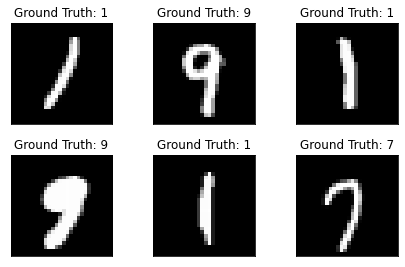

In [9]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [10]:
#TODO

### 15.2 Bonus: Conditional GAN
For the bonus, we would like you to program a conditional GAN. This GAN should produce the output you want. Instead of feeding your generator with just noise, you feed it with noise and label and it should generate the number you want.
To do so, you add a label part to your Generator's input and you tell your discriminator what number it should recognize.

In [11]:
Image(url= "https://raw.githubusercontent.com/znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN/master/pytorch_cGAN.png", width=900)

In [12]:
#TODO

### Congratz, you made it through Assignment 8! You can now try to solve this optional exercise.

This exercise is not graded, but might be a good preparation for the exam.

Please go to the following link: [TBD]().


In the form, you will find the optional task (and the corresponding consent form in case you agree with us processing your data). The task is formulated in German, and we would prefer German as the language for your answer. However, if you don’t feel comfortable with that, please feel free to solve it in English.